In [59]:
!pip install praw

In [60]:
import praw
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [61]:
user_agent = "web:CS579:v1.0 (by u/Relevant-Fig-773)"

reddit = praw.Reddit(
    client_id="qy6TBi9qSnML8nLApahmvg",
    client_secret="_TjZdio3jXn7Gpy6e2ABszjNIBX02w",
    user_agent=user_agent,
)

In [62]:
subreddit = reddit.subreddit("championsleague")

G = nx.Graph()

# Fetch data from top hot posts and their comments
for submission in subreddit.hot(limit=15):
    # Add the original post as the center node
    G.add_node(submission.id, title=submission.title, type="post")
    # Iterate through comments on the post
    for comment in submission.comments:
        # Check if the comment has a valid author
        if comment.author:
            # Add each commenting user as a node and connect them to the post
            G.add_node(comment.author, type="user")
            G.add_edge(submission.id, comment.author)



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [63]:
print(f"Size of network: {(len(G.nodes))} nodes")
print(f"Size of network: {(len(G.edges))} edges")

Size of network: 196 nodes
Size of network: 218 edges


In [64]:
colors = ['red' if type(node) is str else 'skyblue' for node in G]

In [65]:
assert len(colors) == len(G.nodes)

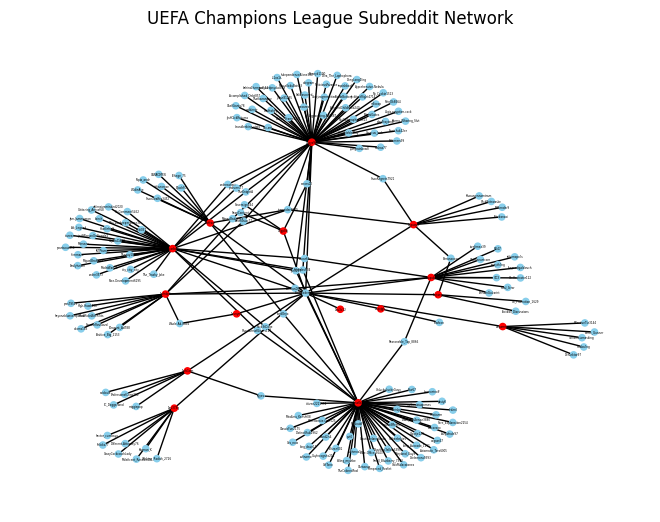

In [66]:
# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=2, node_size=20, node_color=colors, font_color="black")
plt.title("UEFA Champions League Subreddit Network")
plt.show()

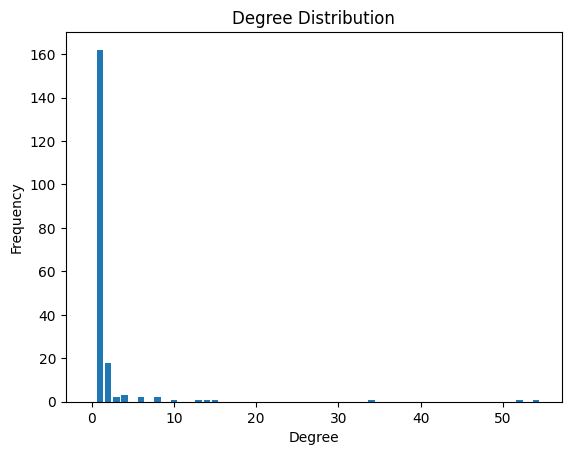

Degree Distribution: [0, 162, 18, 2, 3, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

Network Measures:
Average Clustering Coefficient: 0.0
Pagerank:
  18gp8kj: 0.008711690541043827
  AutoModerator: 0.028680767489772933
  ecross02: 0.004409098574462326
  SeanContent: 0.002616907442450493
  Sovereign444: 0.002616907442450493
  1aunyn3: 0.004226414736860251
  Whole-Ad-8494: 0.0043214086494697285
  1au378g: 0.018877486553641073
  Felicks77: 0.0027714021264491147
  hector_cumbaya: 0.0027714021264491147
  Karman_K: 0.0027714021264491147
  Working_Radish_2726: 0.0027714021264491147
  Maleficent_Resolve44: 0.0027714021264491147
  Different-Attorney76: 0.0027714021264491147
  CrazyCockroachLady: 0.0027714021264491147
  1au3c12: 0.0023901825823515795
  1aso0as: 0.11284573283610244
  Automatic_Taro6005: 0.0026102706953977026
  Pow67: 0.0026102706953977026
  Kyyes: 0.004497307900321563
  suchm

In [67]:
# Calculate network measures
degree_distribution = nx.degree_histogram(G)

# Plot Degree Distribution
plt.bar(range(len(degree_distribution)), degree_distribution, align="center")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Print Degree Distribution (if needed)
print("Degree Distribution:", degree_distribution)

# Calculate other network measures
clustering_coefficient = nx.average_clustering(G)
pagerank = nx.pagerank(G)
diameter = nx.diameter(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print other measures
print("\nNetwork Measures:")
print("Average Clustering Coefficient:", clustering_coefficient)
print("Pagerank:")
for node, value in pagerank.items():
    print(f"  {node}: {value}")
print("Diameter:", diameter)
print("Closeness Centrality:")
for node, value in closeness_centrality.items():
    print(f"  {node}: {value}")
print("Betweenness Centrality:")
for node, value in betweenness_centrality.items():
    print(f"  {node}: {value}")